In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr
from scipy.stats import uniform

• The food_consumption dataset contains information about the kilograms of food consumed per person per year in each country in each food category (consumption) as well as information about the carbon footprint of that food category (co2_emissions) measured in kilograms of carbon dioxide, or CO2, per person per year in each country.
• In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your pandas and numpy skills.
• Instructions#1
• Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for
'USA'. Call these be_consumption and usa_consumption.
• Calculate the mean and median of kilograms of food consumed per person per year for both countries.
• Instructions#2
• Subset food_consumption for rows with data about Belgium and the USA.
• Group the subsetted data by country and select only the consumption column.
• Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().

In [5]:
food_consumption = pd.read_csv("food_consumption.csv")
Belgium = food_consumption[food_consumption["country"] == 'Belgium'] 
USA = food_consumption[food_consumption["country"] == "USA"]


In [11]:
print(Belgium['consumption'].agg([np.mean, np.median]))
print(USA['consumption'].agg([np.mean, np.median]))

mean      42.132727
median    12.590000
Name: consumption, dtype: float64
mean      44.65
median    14.58
Name: consumption, dtype: float64


In [33]:
subset_food_consum =  food_consumption[(food_consumption['country'] == 'Belgium') | (food_consumption['country'] == 'USA')]
groupby_food_consum = subset_food_consum.groupby('country')['consumption']
result = groupby_food_consum.agg(['mean', 'median'])
result

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


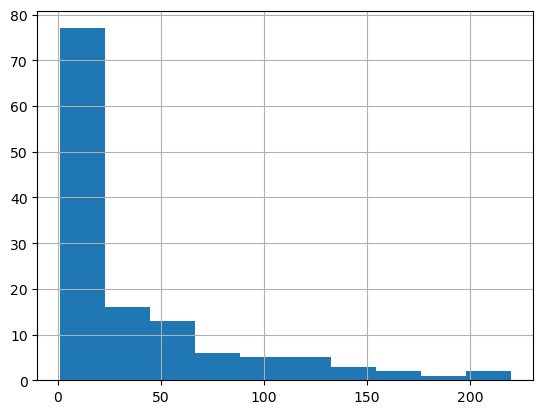

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [54]:
rice_consumption = food_consumption[food_consumption["food_category"] == "rice"]
plt.hist(rice_consumption['co2_emission'])
plt.grid(True)
plt.show()
#Right-skewed
#mean is higher than median
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

Complete the following tasks.

• Calculate the quartiles of the co2_emission column of food_consumption.

• Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the
co2_emission column of food_consumption.

• Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).

In [60]:
quartile = np.quantile(food_consumption['co2_emission'], [0, 0.25 , 0.5 , 0.75, 1])
quartile

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [61]:
six_quantile = np.quantile(food_consumption['co2_emission'], [0,0.2,0.4,0.6,0.8,1])
six_quantile

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [62]:
ten_quantile = np.quantile(food_consumption['co2_emission'], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 , 0.7 ,0.8, 0.9, 1])
ten_quantile

array([0.00000e+00, 6.68000e-01, 3.54000e+00, 7.04000e+00, 1.10260e+01,
       1.65300e+01, 2.55900e+01, 4.42710e+01, 9.99780e+01, 2.03629e+02,
       1.71200e+03])

Complete the following tasks

• Calculate the variance and standard deviation of co2_emission for each food_category by grouping (groupby food_category) and aggregating.

• Create a histogram of co2_emission for the beef food_category and show the plot. (subset food_category for beef, select co2_emission column and plot .hist())

• Create a histogram of co2_emission for the eggs food_category and show the plot.

In [68]:
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


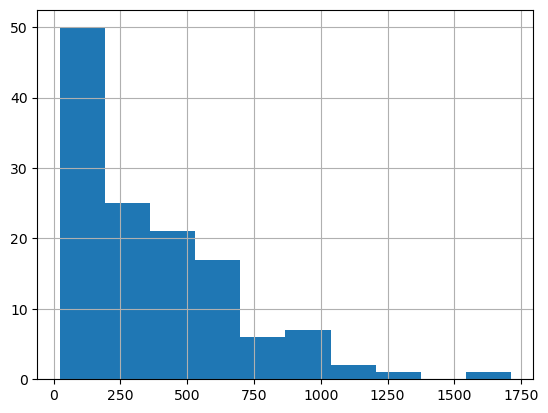

In [71]:
food_consumption[food_consumption['food_category'] == "beef"]['co2_emission'].hist()
plt.show()

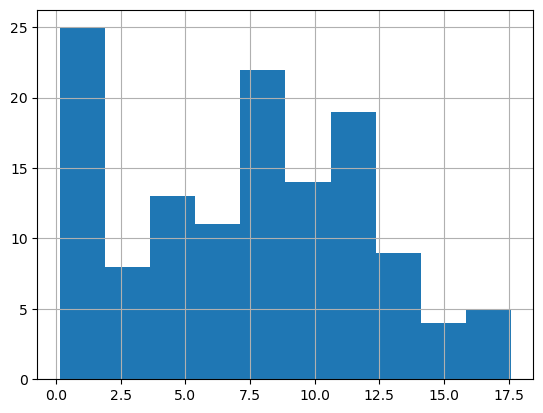

In [73]:
food_consumption[food_consumption['food_category'] == "eggs"]['co2_emission'].hist()
plt.show()

Finding outliers using IQR

• Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than Q1−1.5×IQR or greater than Q3+1.5×IQR, it's considered an outlier.

• Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

• Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.

• Calculate the interquartile range of emissions_by_country and store it as iqr.

• Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper.

• Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission
less than the lower cutoff.

In [93]:

#data
emissions_by_country = food_consumption.groupby('country')["co2_emission"].sum()

q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

#booler
#outliers = emissions_by_country[(emissions_by_country < lower)] | emissions_by_country[(emissions_by_country > upper)]

#numeric
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)] 
#less than "lower" or greater than "upper"
outliers

country
Argentina    2172.4
Name: co2_emission, dtype: float64

In [90]:
lower


-550.0787500000001

In [91]:
upper

2107.89125

Calculating probabilities

• You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

• Complete the following tasks.

• Load amir_deals.csv to amir_deals

• Count the number of deals Amir worked on for each product type and store in counts.

• Calculate the probability of selecting a deal for the different product types by dividing the counts by the total number
of deals Amir worked on. Save this as probs.

• If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C? (15%, 80.43%, 8.43%, 22.5% or 124.3%)

In [97]:
amir_deals = pd.read_csv("amir_deals.csv")
counts = amir_deals['product'].value_counts()
probs = counts / amir_deals.shape[0]
probs

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64

Sampling deals
• In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

• Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

• Complete the following tasks.

• Set the random seed to 24.

• Take a sample of 5 deals without replacement and store them as sample_without_replacement.

• Take a sample of 5 deals with replacement and save as sample_with_replacement.

In [112]:
np.random.seed(24)
sample_without_replacement = amir_deals.sample(5)
print("SAMPLE WITHOUT REPLACEMENT")
print(sample_without_replacement)
sample_with_replacement = amir_deals.sample(5, replace = True)
print("SAMPLE WITH REPLACEMENT")
print(sample_with_replacement)

SAMPLE WITHOUT REPLACEMENT
     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11
SAMPLE WITH REPLACEMENT
     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


Creating a probability distribution

• A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups (from restaurant_groups.csv) DataFrame.

• Complete the following tasks

• Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6].
Remember to show the plot.

• Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.

• Reset the index of size_dist.

• Rename the columns of size_dist to group_size and prob.

• Calculate the expected value of the size_distribution, which represents the expected group size, by multiplying the group_size by the prob and taking the sum.

• Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more and summing the probabilities of selecting those groups.

   Unnamed: 0 group_id  group_size
0           0        A           2
1           1        B           4
2           2        C           6
3           3        D           2
4           4        E           2
5           5        F           2
6           6        G           3
7           7        H           2
8           8        I           4
9           9        J           2


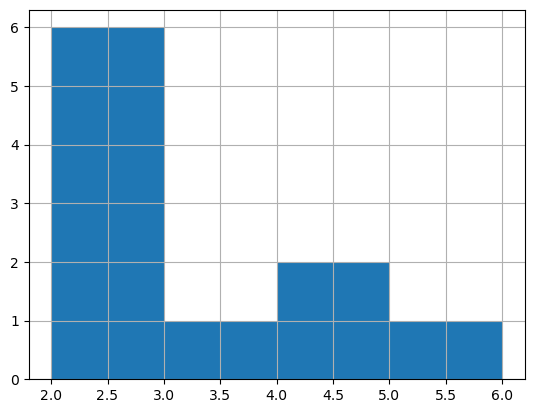

In [127]:
restaurant_groups = pd.read_csv("restaurant_groups.csv")
print(restaurant_groups)
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6]) 
plt.show()

In [128]:
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
size_dist = size_dist.reset_index()
size_dist

,index,group_size
0,2,0.6
1,4,0.2
2,6,0.1
3,3,0.1


In [136]:
#Counting the number of each group size
size_dist.columns = ['group_size', 'prob'] 
size_dist

,group_size,prob
0,2,0.6
1,4,0.2
2,6,0.1
3,3,0.1


In [137]:
expected_value = np.sum(size_dist['group_size'] * size_dist['prob']) 
print("EXPECTED VALUE: ",expected_value)

EXPECTED VALUE:  2.9000000000000004


In [138]:
group_of_4_or_more = size_dist[size_dist['group_size'] >= 4]
#subsetting group size of 4 or more
group_of_4_or_more

,group_size,prob
1,4,0.2
2,6,0.1


In [139]:
sum_of_4_or_more = np.sum(group_of_4_or_more["prob"])
print("SUMMATION OF. PROBABLITY OF 4 or more : ", sum_of_4_or_more)

SUMMATION OF. PROBABLITY OF 4 or more :  0.30000000000000004


Practice – Data back-ups

• The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

• To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.

• Import uniform from scipy.stats and calculate the probability that Amir has to wait less than 5 minutes, and store in a variable called prob_less_than_5.

• Calculate the probability that Amir has to wait more than 5 minutes, and store in a variable called prob_greater_than_5.

• Calculate the probability that Amir has to wait between 10 and 20 minutes, and store in a variable called prob_between_10_and_20.

In [144]:
min_time = 0
max_time = 30
prob_less_than_5 = uniform.cdf(5, 0 , 30)
print("LESS THAN 5: ", prob_less_than_5)
prob_greater_than_5 = 1 - uniform.cdf(5,0 , 30)
print("GREATER THAN 5: ", prob_greater_than_5)
prob_between_10_and_20 = uniform.cdf(20, 0 , 30) - uniform.cdf(10 , 0 , 30)
print("BETWEEN 10 and 20: ", prob_between_10_and_20)

LESS THAN 5:  0.16666666666666666
GREATER THAN 5:  0.8333333333333334
BETWEEN 10 and 20:  0.3333333333333333


Simulating wait times

• To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

• Set the random seed to 334.

• Generate 1000 wait times from the continuous uniform distribution that models Amir's wait time. Save this as wait_times.

• Create a histogram of the simulated wait times and show the plot.

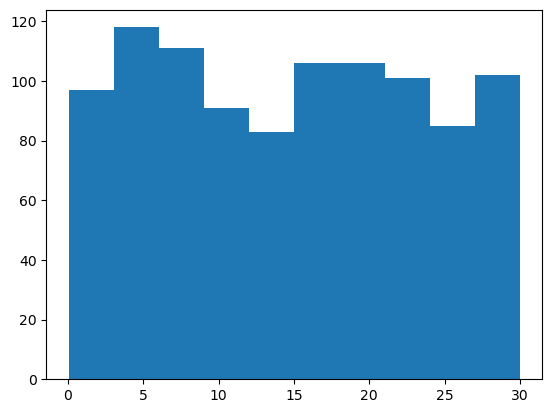

In [149]:
np.random.seed(334)
wait_times = uniform.rvs(0,30, size = 1000)
plt.hist(wait_times)
plt.show()